In [1]:
import os
import numpy as np
import pandas as pd

import json
import pickle

# import cfdna_covid19

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
font_size = 10
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400, 'axes.linewidth':0.5,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size} # 'figure.figsize':(11.7/1.5,8.27/1.5)

flatui_2cls = ['#e41a1c','#4daf4a']
flatui_3risk= ['#377eb8', '#984ea3','#ff7f00']

flatui = ['#ff7f00','#4daf4a','#984ea3','#377eb8', '#e41a1c']

sns.set(style='ticks',rc=rc) #talk, ticks, paper
sns.set_context("paper")
sns.color_palette(flatui_3risk)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

centimeter = 1/2.54  # centimeter in inches

feat_types = 'lab, fragl, tss, motif, m2model'

In [3]:
import sklearn
print('sklearn:'+sklearn.__version__)

from sklearn import metrics
from scipy import stats

sklearn:0.23.2


In [4]:
model_re_root_dir = r'~/model'

raw_data_dir = r'~/data'

In [5]:
# load tss-gene name
tss_gene_ls_fname = r'~/20211104_model_feature/tss_177_trans_and_169gene.list'
tss_gene_df = pd.read_csv(tss_gene_ls_fname,sep='\t',names=['tss','gene','trans'], header=None)


fragl_raw_insert_fname = r'~/insertSize_20210302/s399.triage.len.txt'


In [6]:
lab_raw_fname = os.path.join(raw_data_dir,'399_labtest_fill.csv')

fragl_raw_fname= os.path.join(raw_data_dir,'insert.399s.data.csv')
tss_raw_fname=os.path.join(raw_data_dir,'tss.fillna.pkl')
motif_fname=os.path.join(raw_data_dir, '399_patients_motif_proportion.csv')


In [7]:
from sklearn.preprocessing import StandardScaler

def normal_data(raw_data_df, n_std = 3):
    raw_data_df.sort_values(by='new_triage',inplace=True)
    raw_data_df.reset_index(drop=True, inplace=True)
    
    pat_info = raw_data_df[['ind', 'new_triage']].copy()
    feats_val_df = raw_data_df.drop(columns=['ind', 'new_triage']).copy()
    
    feat_val_mat = feats_val_df.values
    p_vals = []
    
    for i_feat in feats_val_df.columns:
        _, p = stats.mannwhitneyu(raw_data_df.loc[raw_data_df['new_triage']==0, i_feat].astype(float),
                     raw_data_df.loc[raw_data_df['new_triage']==1, i_feat].astype(float),alternative='two-sided')
        p_vals.append(p)
   
    if n_std is not None:
        
        std_feat = feat_val_mat.std(0)
        stnd_f = StandardScaler().fit_transform(feat_val_mat)
        
        stand_feat = np.zeros_like(stnd_f)
        lower_n = n_std
        min_feat = -lower_n*std_feat
        max_feat = lower_n*std_feat
        
        for k_f in range(len(std_feat)):
            stand_feat[:,k_f] = np.clip(stnd_f[:,k_f], min_feat[k_f], max_feat[k_f])
    else:
        stand_feat = feat_val_mat
        
    stand_feat_df = pd.DataFrame(data=stand_feat, columns=feats_val_df.columns)
    
    return pat_info, stand_feat_df,-1*np.log10(p_vals).astype(int)

# Data report

## lab_raw_data

In [9]:
lab_raw_data11 = pd.read_csv(lab_raw_fname)

In [12]:
lab_raw_data11['PID']= ['PU{}'.format(x[5:9]) for x in lab_raw_data11['ind'].values]

In [ ]:
lab_raw_data11.head()

In [14]:
lab_raw_data11.to_csv('results_plt/raw_lab_399_filled.csv', sep='\t', index=False)

## fragl_raw_data

In [19]:
fragl_raw_data11 = pd.read_csv(fragl_raw_fname)
fragl_raw_data11['PID']= ['PU{}'.format(x[5:9]) for x in fragl_raw_data11['ind'].values]

In [ ]:
fragl_raw_data11.head()

In [21]:
fragl_raw_data11.to_csv('results_plt/raw_fragl_399.csv', sep='\t', index=False)

## tss_raw_dat

In [22]:
# get TSS features

tss_feats_fname = os.path.join(model_re_root_dir, 'tss/00_tst_df.csv')
tss_sel_feats = pd.read_csv(tss_feats_fname,sep='\t').columns[2:]

with open(tss_raw_fname, 'rb') as f:
    tss_raw_dat11 = pickle.load(f)[['ind','label']+tss_sel_feats.tolist()].copy()

tss_raw_dat11.rename(columns={"label": "new_triage"}, inplace=True)

In [ ]:
tss_raw_dat11['PID']= ['PU{}'.format(x[5:9]) for x in tss_raw_dat11['ind'].values]
tss_raw_dat11.head()

In [27]:
tss_raw_dat11.to_csv('results_plt/raw_tss_399.csv', sep='\t', index=False)

In [37]:
tss_gene_df.to_csv('results_plt/raw_tss_genen_name_177.csv', sep='\t', index=False)

## motif_data

In [28]:
motif_data11 = pd.read_csv(motif_fname)

In [ ]:
motif_data11['PID']= ['PU{}'.format(x[5:9]) for x in motif_data11['ind'].values]
motif_data11.head()

In [31]:
motif_data11.to_csv('results_plt/raw_motif_399.csv', sep='\t', index=False)

# Lab

/zfssz2/ST_MCHRI/BIGDATA/USER/baiyong/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


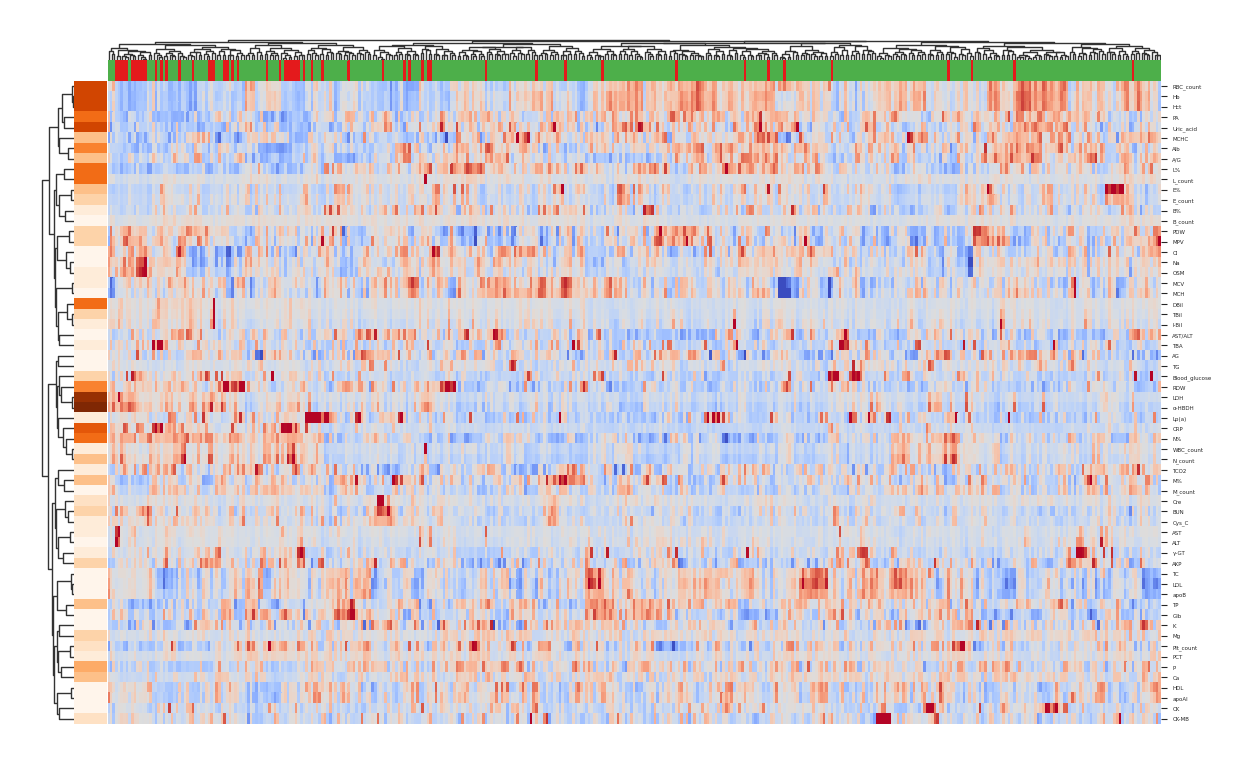

In [37]:

font_size = 2
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400, 'axes.linewidth':0.5,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size} # 'figure.figsize':(11.7/1.5,8.27/1.5)
sns.set(style='ticks',rc=rc) #talk, ticks, paper


from matplotlib import cm

lab_raw_data = pd.read_csv(lab_raw_fname)

pat_info, stand_feat_df, neg_log10_p_vals = normal_data(lab_raw_data,n_std=5)

flatui_2cls = {'Critical':'#e41a1c','Noncritical':'#4daf4a'}
col1 = pat_info['new_triage'].map({0:'Noncritical',1:'Critical'}).map(flatui_2cls)

a = cm.get_cmap('Oranges',neg_log10_p_vals.max())
colors = a(neg_log10_p_vals)

# g = sns.clustermap(stand_feat_df.T,col_colors=col1,row_colors=colors,cmap=plt.get_cmap("coolwarm"), z_score=1,dendrogram_ratio=0.03,
#                    center=0.0,row_cluster=True, col_cluster=True, figsize=(7.5*centimeter, 4*centimeter),
#                    metric="correlation", method='complete',vmin = -3.5, vmax=3.5,
#                    cbar_pos=(0.1, 1., 0.02, 0.15),cbar_kws={"ticks":[-3,0,3]}, 
#                    xticklabels=False, yticklabels=False) 

g = sns.clustermap(stand_feat_df.T,col_colors=col1,row_colors=colors,cmap=plt.get_cmap("coolwarm"), z_score=1,
                   dendrogram_ratio=0.03,
                   center=0.0,row_cluster=True, col_cluster=True, figsize=(8*centimeter, 4.5*centimeter),
                   metric="correlation", method='complete',vmin = -3.5, vmax=3.5, 
                   tree_kws={'linewidths':0.25},
                   xticklabels=False, yticklabels=False) 
g.ax_cbar.set_visible(False)
g.ax_heatmap.tick_params(direction='out', length=1, pad=1, width=0.2)
g.ax_col_colors.set_yticks([])

# g.ax_col_colors.tick_params(axis='y', direction='out', length=1, pad=1, width=0.2)

reordered_labels = stand_feat_df.columns[g.dendrogram_row.reordered_ind].tolist()
use_labels = stand_feat_df.columns
use_ticks = [reordered_labels.index(label) + .5 for label in use_labels]
g.ax_heatmap.set(yticks=use_ticks, yticklabels=use_labels)
xlbls = g.ax_heatmap.yaxis.get_majorticklabels()
for lbl in xlbls:
    lbl.set_fontsize(0.2)

# ax_row_colors = g.ax_row_colors
# box = ax_row_colors.get_position()
# box_heatmap = g.ax_heatmap.get_position()
# ax_row_colors.set_position([box_heatmap.max[0], box.y0, box.width*1.5, box.h
plt.savefig("results_plt/raw_data_lab.pdf", format='pdf', dpi=400, bbox_inches='tight')


In [119]:
uselabels = stand_feat_df.columns.tolist()
reordered_labels = stand_feat_df.columns[g.dendrogram_row.reordered_ind].tolist()
reordered_neg_log10_p_vals = [neg_log10_p_vals[uselabels.index(x)] for x in reordered_labels]
reordered_label_p_vals = dict(zip(reordered_labels,reordered_neg_log10_p_vals))
reordered_label_p_vals

{'RBC_count': 10,
 'Hb': 10,
 'Hct': 10,
 'PA': 8,
 'Uric_acid': 10,
 'MCHC': 4,
 'Alb': 7,
 'A/G': 4,
 'L%': 8,
 'L_count': 8,
 'E%': 4,
 'E_count': 3,
 'B%': 1,
 'B_count': 0,
 'PDW': 3,
 'MPV': 3,
 'Cl': 0,
 'Na': 0,
 'OSM': 1,
 'MCV': 1,
 'MCH': 0,
 'DBil': 8,
 'TBil': 3,
 'I-Bil': 1,
 'AST/ALT': 0,
 'TBA': 1,
 'AG': 0,
 'TG': 0,
 'Blood_glucose': 3,
 'RDW': 7,
 'LDH': 12,
 'α-HBDH': 14,
 'Lp(a)': 1,
 'CRP': 9,
 'N%': 8,
 'WBC_count': 1,
 'N_count': 4,
 'TCO2': 1,
 'M%': 4,
 'M_count': 0,
 'Cre': 2,
 'BUN': 3,
 'Cys_C': 1,
 'AST': 1,
 'ALT': 0,
 'γ-GT': 1,
 'AKP': 3,
 'TC': 0,
 'LDL': 0,
 'apoB': 0,
 'TP': 4,
 'Glb': 0,
 'K': 0,
 'Mg': 3,
 'Plt_count': 2,
 'PCT': 1,
 'P': 5,
 'Ca': 4,
 'HDL': 0,
 'apoAI': 0,
 'CK': 0,
 'CK-MB': 2}

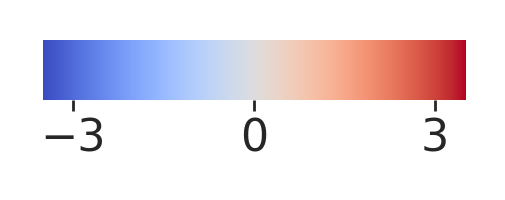

In [141]:
font_size = 8
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400, 'axes.linewidth':0.5,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size} # 'figure.figsize':(11.7/1.5,8.27/1.5)
sns.set(style='ticks',rc=rc) #talk, ticks, paper

fig, ax = plt.subplots(1, 1, figsize=(2, 0.2))
cmap = plt.cm.get_cmap('coolwarm')
colors = cmap(np.linspace(0, 1, len(stand_feat_df.values.ravel())))
ax.imshow([colors],extent=[-3.5, 3.5, 0, 1])
ax.set_yticks([])
ax.set_xticks([-3,0,3])
ax.tick_params(axis='x', direction='out', length=2, pad=1, width=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.savefig("results_plt/raw_data_lab_val_cbar.pdf", format='pdf', dpi=400, bbox_inches='tight')
    

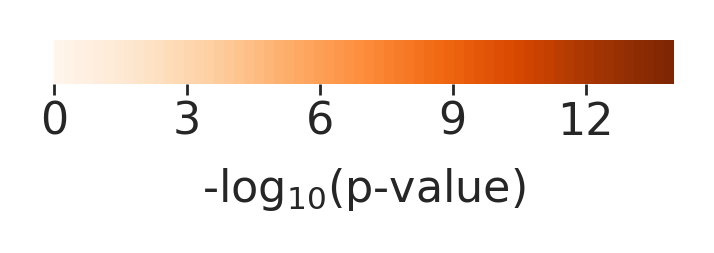

In [142]:
fig, ax = plt.subplots(1,1,figsize=(2, 0.6))
cmap = cm.get_cmap('Oranges')
colors = cmap(np.linspace(0, 1, len(neg_log10_p_vals)))
ax.imshow([colors],extent=[0, neg_log10_p_vals.max(), 0, 1])
ax.set_yticks([])
ax.set_xticks([0,3,6,9,12])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(r'-$\log_{10}$(p-value)')
ax.tick_params(direction='out', length=2, pad=1, width=0.5)
plt.savefig("results_plt/raw_data_lab_pval_cbar.pdf", dpi=400, bbox_inches='tight')

# Fragl

In [120]:
fragl_raw_data = pd.read_csv(fragl_raw_insert_fname).drop(columns=['2000','Unnamed: 2002'])
fragl_raw_data.iloc[:,2:]=fragl_raw_data.iloc[:,2:].div(fragl_raw_data.iloc[:,2:].sum(1), axis=0)

# fragl_raw_data['new_triage'].apply(lambda x: '#4daf4a' if x==0 else '#e41a1c')
fragl_raw_prop_data = pd.read_csv(fragl_raw_fname)
fragl_raw_prop_data.rename(columns={'label':'new_triage'}, inplace=True)


In [121]:
a = 103
b=[]
b.append(a)
while a<=250:
    a = a+10.4
    b.append(a)
b = np.array([int(x) for x in b])

p_vals=[]
p_real=[]
for idx in b[:-1]:
    _, p = stats.mannwhitneyu(fragl_raw_prop_data.loc[fragl_raw_prop_data['new_triage']==0, str(idx)].astype(float),
                              fragl_raw_prop_data.loc[fragl_raw_prop_data['new_triage']==1, str(idx)].astype(float),
                              alternative='two-sided')
    p_vals.append(-1*np.log10(p).astype(int))
    p_real.append(p)
    

In [122]:
b

array([103, 113, 123, 134, 144, 155, 165, 175, 186, 196, 207, 217, 227,
       238, 248, 259])

In [123]:
p_vals

[0, 0, 0, 0, 1, 2, 0, 1, 3, 3, 3, 2, 1, 0, 0]

In [124]:
p_real

[0.16486414492168133,
 0.2810350607371469,
 0.8198160262341029,
 0.560683514360176,
 0.025732218423755834,
 0.004990993089066157,
 0.15140682216412948,
 0.012944447171716066,
 0.0002469099766219914,
 0.00015153839743159943,
 0.00042617922610146345,
 0.001922066049848064,
 0.04530481624469232,
 0.6767812693848203,
 0.26222727895410003]

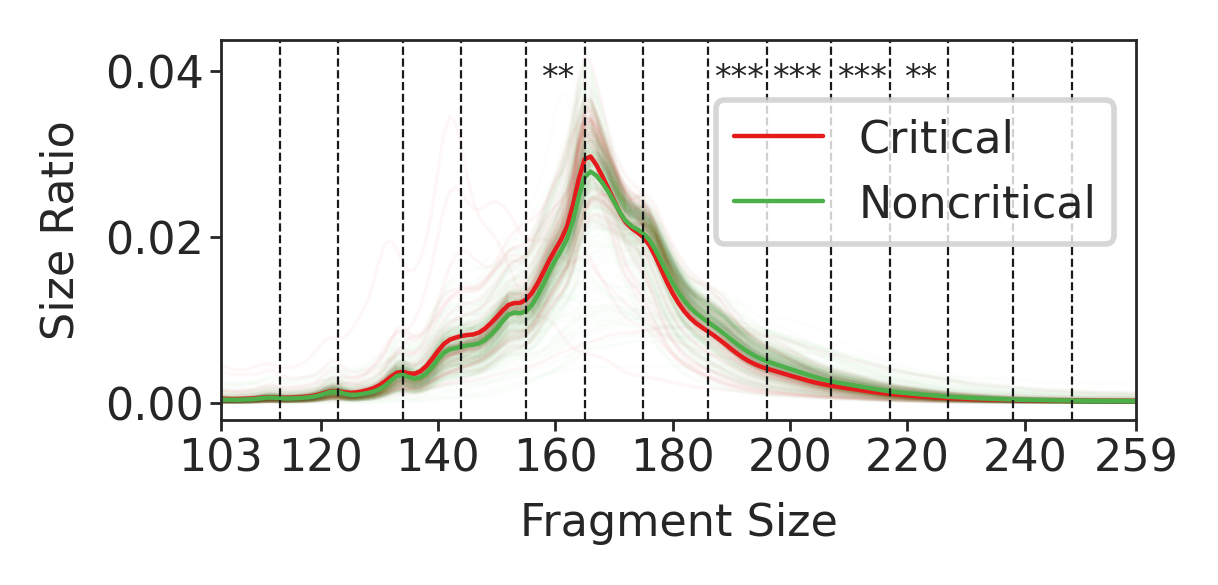

In [143]:
font_size = 8
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400, 'axes.linewidth':0.5,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size} # 'figure.figsize':(11.7/1.5,8.27/1.5)
sns.set(style='ticks',rc=rc) #talk, ticks, paper

fig, ax = plt.subplots(1,1, figsize=(7.5*centimeter, 3.2*centimeter))
criticals = []
non_criticals =[]
for index, row in fragl_raw_data.iterrows():
    i_dat = row[2:].values
    if row['new_triage'] == 1:
        color = "#e41a1c"
        criticals.append(i_dat)
        alpha=0.03
    else:
        color = "#4daf4a"
        non_criticals.append(i_dat)
        alpha=0.01
    ax.plot(np.arange(1,2000), i_dat, c=color, alpha=alpha, lw=0.6)
    
ax.plot(np.arange(1,2000),np.mean(criticals,axis=0), c="#e41a1c",lw=0.8,label='Critical')
ax.plot(np.arange(1,2000),np.mean(non_criticals,axis=0), c="#4daf4a",lw=0.8,label='Noncritical')


for idx_b,i_b in enumerate(b[:-1]):
    ax.axvline(x=i_b, ls='--', lw=0.4,c='k')
    if p_vals[idx_b]>=3:
        ax.text(i_b+1, 0.038, '*'*p_vals[idx_b], fontsize=6)
    elif p_vals[idx_b]==2:
        ax.text(i_b+2.5, 0.038, '*'*p_vals[idx_b], fontsize=6)

ax.set_xticks([103, 120, 140, 160, 180, 200, 220, 240, 259])
# ax.set_xticks(b)
# ax.set_xticklabels([str(x)+'bp' for x in b], rotation=45, ha='right',rotation_mode="anchor")
ax.set_xlim(103,259)
ax.tick_params(direction='out', length=2,pad=1, width=0.5)
ax.set_xlabel('Fragment Size')
ax.set_ylabel('Size Ratio')
ax.legend(loc='upper right', bbox_to_anchor=(1, 0.9),ncol=1, fontsize=8)

plt.savefig("results_plt/raw_data_fragl.pdf", dpi=400, bbox_inches='tight')

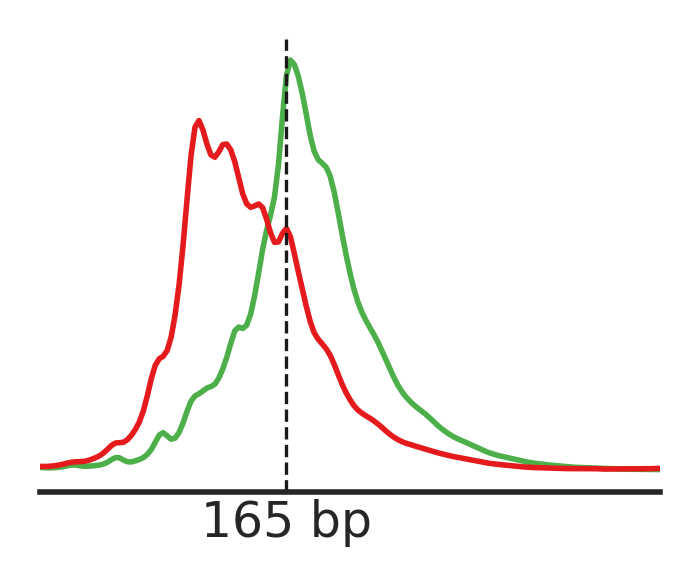

In [157]:
fragl_raw_data_pos = fragl_raw_data[fragl_raw_data['new_triage']==1].copy()
fragl_raw_data_pos.reset_index(drop=True,inplace=True)
fragl_raw_data_neg = fragl_raw_data[fragl_raw_data['new_triage']==0].copy()
fragl_raw_data_neg.reset_index(drop=True,inplace=True)

fig, ax = plt.subplots(1,1, figsize=(2,1.5))

fragl_raw_data_neg.iloc[4,2:]
ax.plot(np.arange(1,2000), fragl_raw_data_neg.iloc[4,2:], c="#4daf4a", lw=1)
ax.plot(np.arange(1,2000), fragl_raw_data_pos.iloc[3,2:], c="#e41a1c", lw=1)
ax.axvline(x=166, ls='--', lw=0.6,c='k')
ax.set_xlim(103,259)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([])
ax.set_xticks([166])
ax.set_xticklabels(['165 bp'])
ax.tick_params(direction='out', length=0,pad=1)

plt.savefig("results_plt/raw_data_fragl_demo.pdf", dpi=400, bbox_inches='tight')

# TSS

In [29]:
# get TSS features

tss_feats_fname = os.path.join(model_re_root_dir, 'tss/00_tst_df.csv')
tss_sel_feats = pd.read_csv(tss_feats_fname,sep='\t').columns[2:]

with open(tss_raw_fname, 'rb') as f:
    tss_raw_dat = pickle.load(f)[['ind','label']+tss_sel_feats.tolist()].copy()

tss_raw_dat.rename(columns={"label": "new_triage"}, inplace=True)


/zfssz2/ST_MCHRI/BIGDATA/USER/baiyong/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


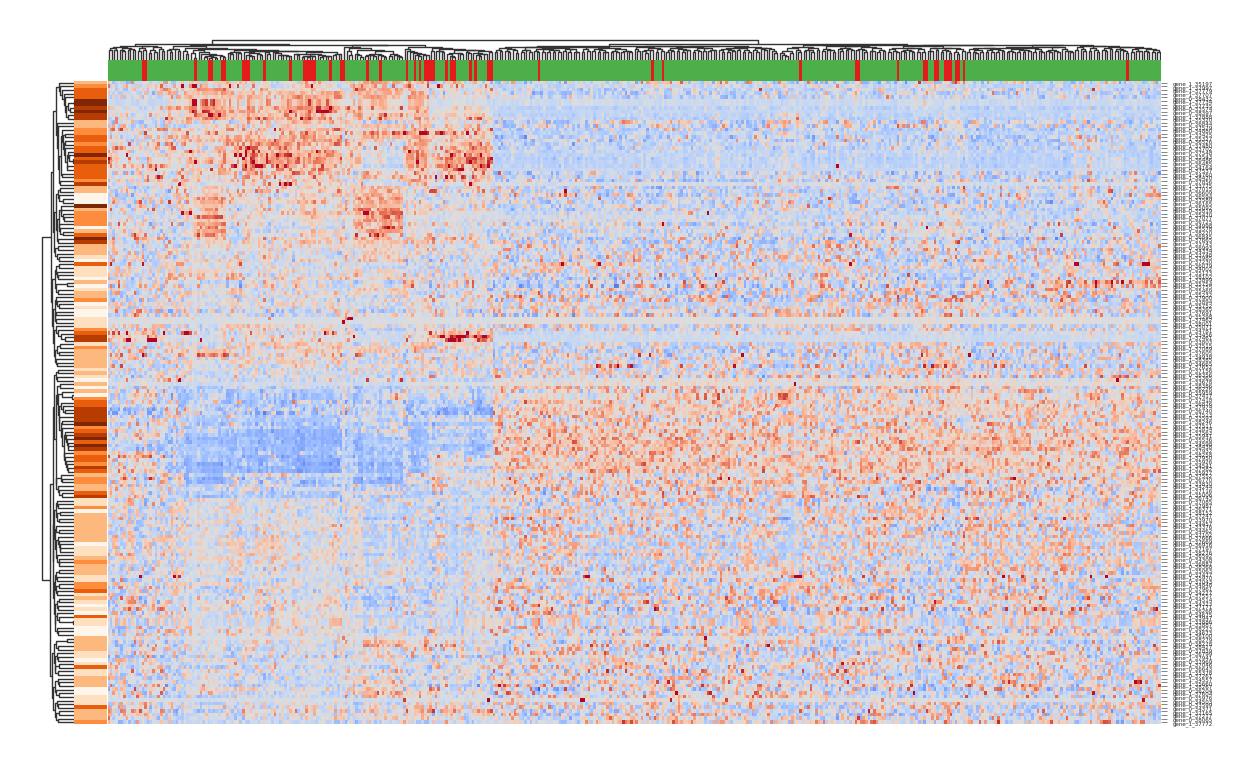

In [35]:
from matplotlib import cm

font_size = 2
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400, 'axes.linewidth':0.5,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size} # 'figure.figsize':(11.7/1.5,8.27/1.5)
sns.set(style='ticks',rc=rc) #talk, ticks, paper

pat_info, stand_feat_df, neg_log10_p_vals = normal_data(tss_raw_dat,n_std=5)

flatui_2cls = {'Critical':'#e41a1c','Noncritical':'#4daf4a'}
col1 = pat_info['new_triage'].map({0:'Noncritical',1:'Critical'}).map(flatui_2cls)

a = cm.get_cmap('Oranges',neg_log10_p_vals.max())
# neg_log10p = neg_log10_p_vals
# neg_log10p = (neg_log10p-neg_log10p.min())/(neg_log10p.max()-neg_log10p.min())
# colors = a(neg_log10p)
colors = a(neg_log10_p_vals)

g = sns.clustermap(stand_feat_df.T,col_colors=col1,row_colors=colors,cmap=plt.get_cmap("coolwarm"), z_score=1,dendrogram_ratio=0.03,
                   center=0.0,row_cluster=True, col_cluster=True, figsize=(8*centimeter, 4.5*centimeter),
                   metric="correlation", method='complete',vmin = -3.5, vmax=3.5, tree_kws={'linewidths':0.25},
                   xticklabels=False, yticklabels=False) 

reordered_labels = stand_feat_df.columns[g.dendrogram_row.reordered_ind].tolist()
use_labels = stand_feat_df.columns
use_ticks = [reordered_labels.index(label) + .5 for label in use_labels]
g.ax_heatmap.set(yticks=use_ticks, yticklabels=use_labels)

xlbls = g.ax_heatmap.yaxis.get_majorticklabels()
for lbl in xlbls:
    lbl.set_fontsize(0.8)

g.ax_cbar.set_visible(False)
g.ax_heatmap.tick_params(direction='out', length=1, pad=1, width=0.1)
g.ax_col_colors.set_yticks([])
# ax_row_colors = g.ax_row_colors
# box = ax_row_colors.get_position()
# box_heatmap = g.ax_heatmap.get_position()
# ax_row_colors.set_position([box_heatmap.max[0], box.y0, box.width*1.5, box.height])

# plt.title('TSS Score\n(Z-Score)')
plt.savefig("results_plt/raw_data_tss.pdf", dpi=400, bbox_inches='tight', format='pdf')


In [28]:
uselabels = stand_feat_df.columns.tolist()
reordered_labels = stand_feat_df.columns[g.dendrogram_row.reordered_ind].tolist()

reordered_neg_log10_p_vals = [neg_log10_p_vals[uselabels.index(x)] for x in reordered_labels]

geness = [tss_gene_df.loc[tss_gene_df['tss']== x, 'gene'].values[0] for x in reordered_labels]

lens = np.arange(len(geness))+1

reordered_label_p_vals = dict(zip(reordered_labels,zip(lens, geness, reordered_neg_log10_p_vals)))
reordered_label_p_vals

{'gene_1_35197': (1, 'GRM8', 2),
 'gene_1_37997': (2, 'MIRLET7A1', 3),
 'gene_1_37779': (3, 'ABHD17B', 4),
 'gene_1_37707': (4, 'FAM95B1,LOC105379252', 4),
 'gene_0_38432': (5, 'SNORA65', 4),
 'gene_1_37734': (6, 'LOC102723709', 6),
 'gene_1_37735': (7, 'LOC105379807', 6),
 'gene_0_33574': (8, 'ARID1B', 5),
 'gene_0_38397': (9, 'WDR38', 7),
 'gene_1_37888': (10, 'ISCA1', 5),
 'gene_1_35320': (11, 'BPGM', 5),
 'gene_0_36844': (12, 'SYBU', 2),
 'gene_0_37579': (13, 'MSMP', 2),
 'gene_0_34880': (14, 'MIR4658', 3),
 'gene_1_33425': (15, 'PEX3', 3),
 'gene_1_35327': (16, 'CYREN', 4),
 'gene_0_36526': (17, 'CRISPLD1', 4),
 'gene_1_37480': (18, 'AQP7', 3),
 'gene_0_33702': (19, 'KIF25-AS1', 4),
 'gene_0_37548': (20, 'PIGO', 4),
 'gene_0_33543': (21, 'MTRF1L', 6),
 'gene_0_36486': (22, 'EYA1', 4),
 'gene_0_36485': (23, 'EYA1', 5),
 'gene_0_34164': (24, 'RP9P', 4),
 'gene_0_37537': (25, 'PHF24', 4),
 'gene_1_34760': (26, 'CALCR', 4),
 'gene_1_38420': (27, 'RALGPS1', 4),
 'gene_0_37856': (28, 'K

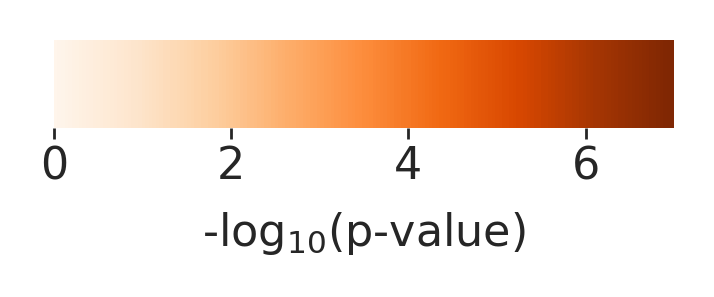

In [151]:
font_size = 8
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400, 'axes.linewidth':0.5,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size} # 'figure.figsize':(11.7/1.5,8.27/1.5)
sns.set(style='ticks',rc=rc) #talk, ticks, paper

fig, ax = plt.subplots(1,1,figsize=(2, 0.3))
cmap = cm.get_cmap(cm.get_cmap('Oranges'))
colors = cmap(np.linspace(0, 1, len(neg_log10_p_vals)))
ax.imshow([colors],extent=[0, neg_log10_p_vals.max(), 0, 1])
ax.set_yticks([])
# ax.set_xticks([0,3,6,9,12])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(r'-$\log_{10}$(p-value)')
ax.tick_params(direction='out', length=2, pad=1,width=0.5)
plt.savefig("results_plt/raw_data_tss_cbar.pdf", dpi=400, bbox_inches='tight')

# Motif

/zfssz2/ST_MCHRI/BIGDATA/USER/baiyong/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


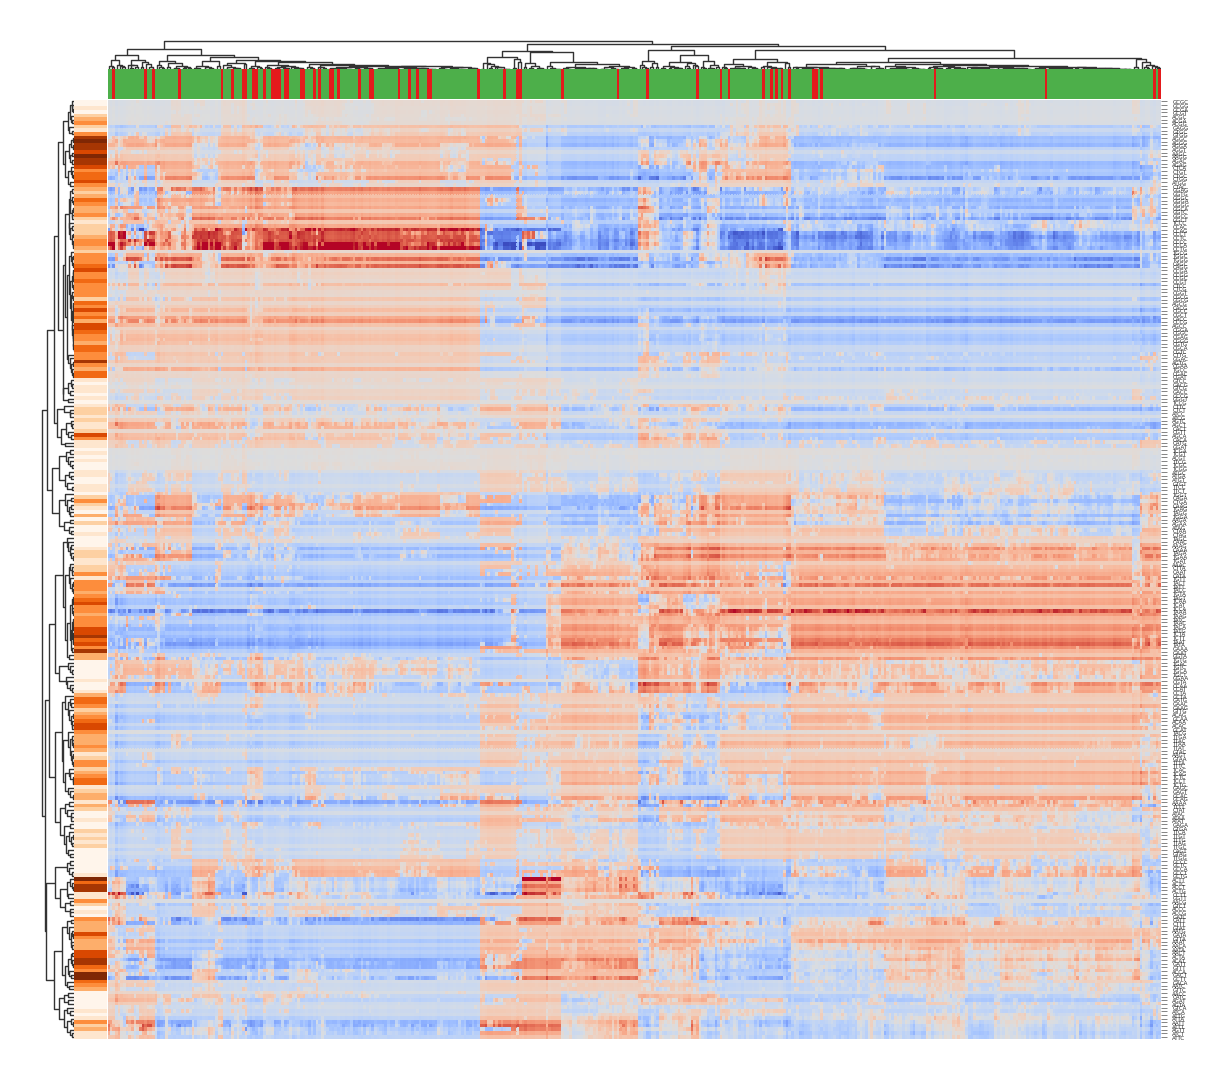

In [36]:
# get Motif features

font_size = 2
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400, 'axes.linewidth':0.5,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size} # 'figure.figsize':(11.7/1.5,8.27/1.5)
sns.set(style='ticks',rc=rc) #talk, ticks, paper

motif_data = pd.read_csv(motif_fname)

pat_info, stand_feat_df, neg_log10_p_vals = normal_data(motif_data,n_std=5)

flatui_2cls = {'Critical':'#e41a1c','Noncritical':'#4daf4a'}
col1 = pat_info['new_triage'].map({0:'Noncritical',1:'Critical'}).map(flatui_2cls)

a = cm.get_cmap('Oranges',neg_log10_p_vals.max())
# neg_log10p = neg_log10_p_vals
# neg_log10p = (neg_log10p-neg_log10p.min())/(neg_log10p.max()-neg_log10p.min())
colors = a(neg_log10_p_vals)

g = sns.clustermap(stand_feat_df.T,col_colors=col1,row_colors=colors,cmap=plt.get_cmap("coolwarm"), z_score=1,dendrogram_ratio=0.03,
                   center=0.0,row_cluster=True, col_cluster=True,
                   metric="correlation", method='complete',vmin = -3.5, vmax=3.5,
                   figsize=(8*centimeter, 6.5*centimeter), tree_kws={'linewidths':0.25},
                   xticklabels=False, yticklabels=False) 

reordered_labels = stand_feat_df.columns[g.dendrogram_row.reordered_ind].tolist()
use_labels = stand_feat_df.columns
use_ticks = [reordered_labels.index(label) + .5 for label in use_labels]
g.ax_heatmap.set(yticks=use_ticks, yticklabels=use_labels)

xlbls = g.ax_heatmap.yaxis.get_majorticklabels()
for lbl in xlbls:
    lbl.set_fontsize(0.6)

g.ax_cbar.set_visible(False)
g.ax_heatmap.tick_params(direction='out', length=1, pad=1, width=0.1)
g.ax_col_colors.set_yticks([])

# ax_row_colors = g.ax_row_colors
# box = ax_row_colors.get_position()
# box_heatmap = g.ax_heatmap.get_position()
# ax_row_colors.set_position([box_heatmap.max[0], box.y0, box.width*1.5, box.height])

plt.title("5' End Motif Frequency\n(Z-Score)")
plt.savefig("results_plt/raw_data_motif.pdf", dpi=400, bbox_inches='tight')


In [157]:
uselabels = stand_feat_df.columns.tolist()
reordered_labels = stand_feat_df.columns[g.dendrogram_row.reordered_ind].tolist()
reordered_neg_log10_p_vals = [neg_log10_p_vals[uselabels.index(x)] for x in reordered_labels]
reordered_label_p_vals = dict(zip(reordered_labels,reordered_neg_log10_p_vals))
reordered_label_p_vals

{'GCGC': 0,
 'GCGG': 0,
 'GCGA': 1,
 'GCGT': 0,
 'ACGC': 2,
 'ACGA': 3,
 'ACGG': 4,
 'GAGG': 2,
 'GTGC': 1,
 'GTGG': 4,
 'AGGC': 7,
 'AGGG': 8,
 'AGGA': 7,
 'AGGT': 7,
 'AAGC': 6,
 'AAGG': 8,
 'AGAC': 7,
 'AGAG': 7,
 'CTCA': 6,
 'CTGT': 4,
 'CTGC': 5,
 'CTGG': 5,
 'ATGG': 6,
 'CTAC': 4,
 'GGAG': 3,
 'GGTG': 2,
 'GGGC': 3,
 'GGGA': 5,
 'GGGG': 4,
 'GGCA': 3,
 'GGTC': 3,
 'GGCC': 4,
 'GGCT': 2,
 'TCCC': 1,
 'CCAC': 2,
 'CCAG': 2,
 'CCCT': 2,
 'CCTC': 3,
 'CCCC': 4,
 'CCCA': 4,
 'CCTG': 3,
 'TGCG': 2,
 'TGGC': 4,
 'TGGG': 4,
 'CAGC': 4,
 'CAGG': 5,
 'CCGA': 6,
 'CCGG': 4,
 'CCGC': 4,
 'CCGT': 5,
 'CTCC': 4,
 'CTCG': 4,
 'CGGT': 4,
 'CGCG': 4,
 'GGCG': 2,
 'AGCG': 5,
 'CACG': 4,
 'CGCC': 6,
 'CGCT': 4,
 'CACC': 5,
 'CCCG': 3,
 'AGCC': 6,
 'CGGA': 6,
 'CGGC': 5,
 'CGAG': 4,
 'CGGG': 4,
 'CGTG': 3,
 'CGCA': 5,
 'CGTC': 5,
 'CTTG': 4,
 'GGAC': 4,
 'AGTG': 7,
 'CGAA': 4,
 'TGCC': 3,
 'CGAC': 5,
 'CGAT': 5,
 'GTCC': 1,
 'GACG': 0,
 'GTCG': 1,
 'GACC': 1,
 'GCCG': 0,
 'GGGT': 1,
 'TCCG': 0,
 'CT

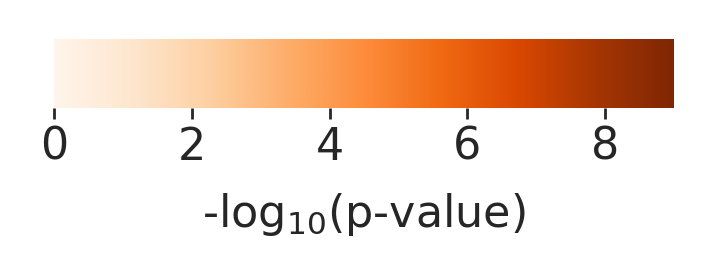

In [156]:
font_size = 8
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400, 'axes.linewidth':0.5,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size} # 'figure.figsize':(11.7/1.5,8.27/1.5)
sns.set(style='ticks',rc=rc) #talk, ticks, paper

fig, ax = plt.subplots(1,1,figsize=(2, 0.3))
cmap = cm.get_cmap(cm.get_cmap('Oranges'))
colors = cmap(np.linspace(0, 1, len(neg_log10_p_vals)))
ax.imshow([colors],extent=[0, neg_log10_p_vals.max(), 0, 1])
ax.set_yticks([])
ax.set_xticks([0,2,4,6,8])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(r'-$\log_{10}$(p-value)')
ax.tick_params(direction='out', length=2, pad=1,width=0.5)
plt.savefig("results_plt/raw_data_motif_cbar.pdf", dpi=400, bbox_inches='tight')


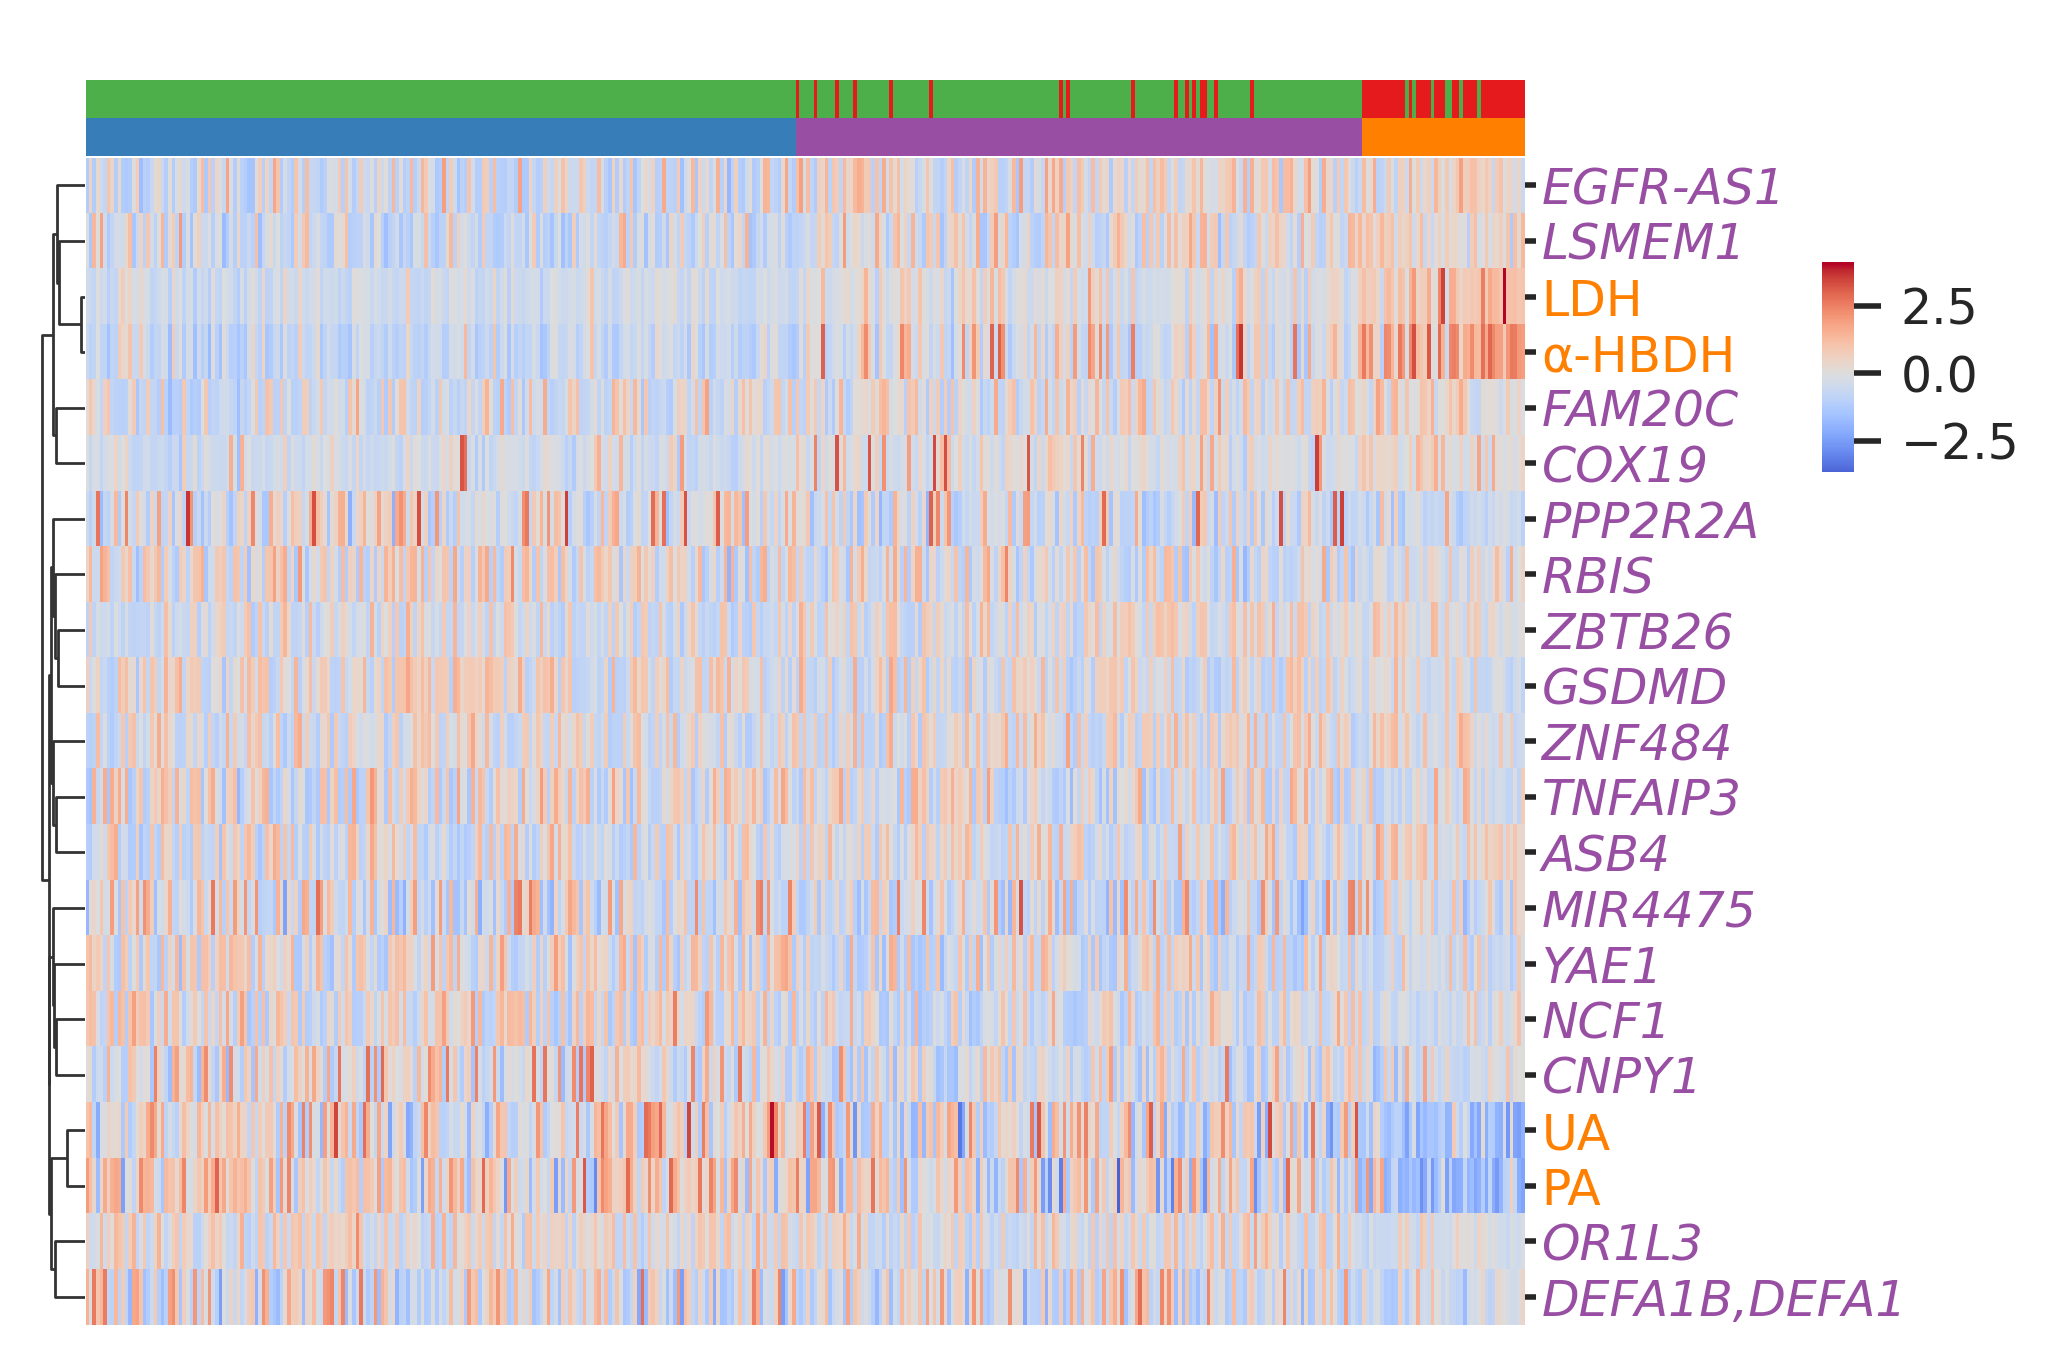

In [24]:
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from matplotlib import cm

lab_tss_imp_feats_data = pd.read_csv('results_plt/lab_tss_importance_feats_data_with_risk.csv', sep='\t')
lab_tss_imp_feats_data.rename(columns={"Uric_acid": "UA"}, inplace=True)

# featsss = [r'$\it{}$'.format(x) if feat_types[x] == 'tss' else x for x in lab_tss_imp_feats_data.columns[2:-1]]  

feat_types = dict(zip(lab_tss_imp_feats_data.columns[2:-1],['lab']*4 +['tss']*17))

lab_tss_imp_feats_data.sort_values(by='risk_level',inplace=True)
pat_info = lab_tss_imp_feats_data[['ind', 'new_triage', 'risk_level']].copy()
feats_val_df = lab_tss_imp_feats_data.drop(columns=['ind', 'new_triage', 'risk_level']).copy()

feat_val_mat = feats_val_df.values
std_feat = feat_val_mat.std(0)

stnd_f = StandardScaler().fit_transform(feat_val_mat)
stand_feat = np.zeros_like(stnd_f)
lower_n = 3
min_feat = -lower_n*std_feat
max_feat = lower_n*std_feat

for k_f in range(len(std_feat)):
    stand_feat[:,k_f] = np.clip(stnd_f[:,k_f], min_feat[k_f], max_feat[k_f])
    
stand_feat_df = pd.DataFrame(data=stand_feat, columns=feats_val_df.columns)

flatui_2cls = {'Critical':'#e41a1c','Noncritical':'#4daf4a'}
flatui_3risk= {'Low Risk':'#377eb8','Medium Risk':'#984ea3','High Risk':'#ff7f00'}

col1 = pat_info['new_triage'].map({0:'Noncritical',1:'Critical'}).map(flatui_2cls)
col2 = pat_info['risk_level'].map({1:'Low Risk',2:'Medium Risk', 3:'High Risk'}).map(flatui_3risk)

g = sns.clustermap(stand_feat_df.T,col_colors=[col1,col2],cmap=plt.get_cmap("coolwarm"), z_score=1,dendrogram_ratio=0.03,
                   center=0.0,row_cluster=True, col_cluster=False, figsize=(4, 3.5),
                   metric="correlation", method='complete',cbar_pos=(1.15, 0.65, 0.02, 0.15),
                   xticklabels=False, yticklabels=False) 
    
reordered_labels = feats_val_df.columns[g.dendrogram_row.reordered_ind].tolist()
use_labels = feats_val_df.columns
use_ticks = [reordered_labels.index(label) + .5 for label in use_labels]
g.ax_heatmap.set(yticks=use_ticks, yticklabels=use_labels)

xlbls = g.ax_heatmap.yaxis.get_majorticklabels()
for lbl in xlbls:
    if feat_types[lbl.get_text()] == 'lab':
        lbl.set_color('#ff7f00')
    else:
        lbl.set_color('#984ea3')
        lbl.set_fontstyle('italic')
    # lbl.set_fontsize(8)

g.ax_heatmap.tick_params(direction='out', length=2, pad=1)

plt.savefig("results_plt/risk_stratification_heatmap.pdf", dpi=400, bbox_inches='tight')